In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataviz/climate_change_data.csv
/kaggle/input/dataviz/goal15.forest_shares.csv


In [3]:
climate_df = pd.read_csv("/kaggle/input/dataviz/climate_change_data.csv")
deforestation_df = pd.read_csv("/kaggle/input/dataviz/goal15.forest_shares.csv")

In [4]:
climate_df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [5]:
climate_df.shape

(10000, 9)

In [6]:
deforestation_df.head()

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


In [7]:
deforestation_df.shape

(237, 4)

In [8]:
deforestation_df.groupby('iso3c')['forests_2000'].sum()

iso3c
ABW     2.3
AFG     1.9
AGO    62.3
AIA    61.1
ALB    28.1
       ... 
WSM    60.5
YEM     1.0
ZAF    14.7
ZMB    63.3
ZWE    47.5
Name: forests_2000, Length: 237, dtype: float64

In [9]:
climate_df.groupby('Country')['CO2 Emissions'].mean()

Country
Afghanistan          403.029928
Albania              403.086827
Algeria              401.639539
American Samoa       392.449374
Andorra              410.238930
                        ...    
Wallis and Futuna    395.606024
Western Sahara       384.047327
Yemen                392.016930
Zambia               395.452485
Zimbabwe             414.444619
Name: CO2 Emissions, Length: 243, dtype: float64

In [10]:
climate_df[climate_df['Country'] == 'India']

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
44,2000-02-06 23:07:43.366336633,Stewartbury,India,13.863784,408.121863,-0.078811,77.498661,31.356005,26.264121
153,2000-05-08 12:47:18.523852384,Port Jesus,India,14.563792,441.458510,0.012392,72.783893,64.897858,44.925654
420,2000-12-18 20:02:48.496849684,Lake Heather,India,8.050407,352.500027,-1.081892,85.429837,90.573097,33.954562
604,2001-05-22 09:51:28.028802880,Port Haydentown,India,12.435437,380.040060,-0.376124,92.218718,7.455810,41.320736
626,2001-06-09 21:25:19.711971192,Marisafort,India,19.580143,412.246774,1.490122,55.683053,63.584592,44.651892
754,2001-09-25 10:09:36.777677760,Jacobland,India,18.290347,312.602899,-0.556386,29.791763,29.240185,47.933234
764,2001-10-03 19:46:49.360936088,South Kimberlyshire,India,12.013457,334.323596,-0.046268,55.820262,98.889572,32.544557
1437,2003-04-22 04:49:02.214221408,New David,India,8.794670,352.886364,-0.773098,98.618001,99.591771,49.080657
2589,2005-12-14 23:27:35.805580544,South Robertstad,India,18.649079,417.644878,-0.488305,74.032718,20.658963,43.859921
2805,2006-06-14 10:27:19.603960384,Bowersfurt,India,15.702748,462.738893,-1.027062,67.324433,39.692066,27.317580


In [11]:
climate_df.isna().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [12]:
deforestation_df.isna().sum()

iso3c            0
forests_2000     0
forests_2020     0
trend           10
dtype: int64

In [13]:
deforestation_df['trend'].isna().sum()

10

In [14]:
deforestation_df_updated = deforestation_df.dropna()

In [15]:
deforestation_df_updated.columns

Index(['iso3c', 'forests_2000', 'forests_2020', 'trend'], dtype='object')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

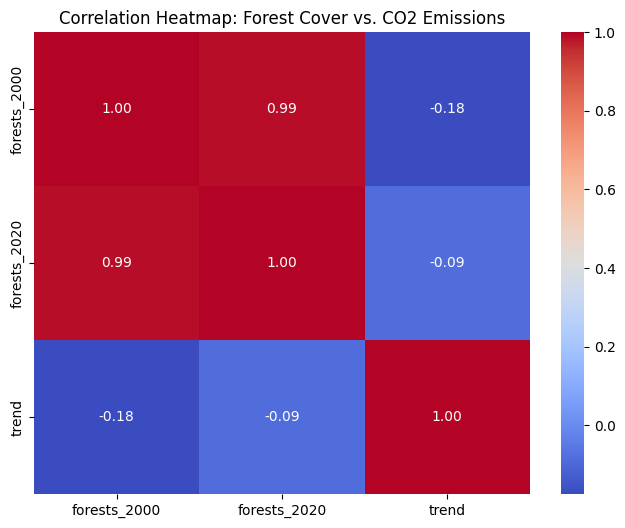

In [17]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = deforestation_df_updated[["forests_2000", "forests_2020","trend"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Forest Cover vs. CO2 Emissions")
plt.show()

In [18]:
%pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 83.9 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pycountry

def iso3_to_country(iso_code):
    try:
        return pycountry.countries.get(alpha_3=iso_code).name
    except AttributeError:
        return None  # Returns None if ISO3 code is not found

# Example usage
iso_code = "IND"
print(iso3_to_country(iso_code))  # Output: Afghanistan

India


In [20]:
deforestation_df_updated['Country'] = deforestation_df_updated['iso3c'].apply(iso3_to_country)

<ipython-input-20-c0cb5665d283>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deforestation_df_updated['Country'] = deforestation_df_updated['iso3c'].apply(iso3_to_country)


In [21]:
deforestation_df_updated.loc[:, 'Country'] = deforestation_df_updated['iso3c'].apply(iso3_to_country)

In [22]:
deforestation_df_updated2 = deforestation_df_updated.reset_index(drop=True)

In [23]:
deforestation_df_updated2

,iso3c,forests_2000,forests_2020,trend,Country
0,AFG,1.9,1.9,0.0,Afghanistan
1,ALB,28.1,28.8,2.5,Albania
2,DZA,0.7,0.8,14.3,Algeria
3,ASM,88.7,85.7,-3.4,American Samoa
4,AND,34.0,34.0,0.0,Andorra
...,...,...,...,...,...
222,ESH,2.5,2.5,0.0,Western Sahara
223,WLD,31.9,31.2,-2.2,None
224,YEM,1.0,1.0,0.0,Yemen
225,ZMB,63.3,60.3,-4.7,Zambia


In [24]:
ranked_deforestation = deforestation_df_updated.sort_values(by="trend")
ranked_deforestation.head(10)

,iso3c,forests_2000,forests_2020,trend,Country
61,EGY,0.1,0.0,-100.0,Egypt
48,CIV,16.0,8.9,-44.4,Côte d'Ivoire
148,NIC,44.9,28.3,-37.0,Nicaragua
76,GMB,35.3,24.0,-32.0,Gambia
40,TCD,5.0,3.4,-32.0,Chad
161,PRY,57.9,40.5,-30.1,Paraguay
180,SPM,7.3,5.3,-27.4,Saint Pierre and Miquelon
123,MWI,32.7,23.8,-27.2,Malawi
219,UGA,15.8,11.7,-25.9,Uganda
35,KHM,61.1,45.7,-25.2,Cambodia


In [25]:
merged_df = climate_df.merge(deforestation_df_updated, on='Country', how='inner')
merged_df

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,iso3c,forests_2000,forests_2020,trend
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,LVA,52.1,54.8,5.2
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,ZAF,14.7,14.1,-4.1
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,GUF,97.7,96.6,-1.1
3,2000-01-06 00:58:19.549954995,Port Richardfurt,Tuvalu,21.646738,387.648437,0.058471,9.650389,11.402284,15.720944,TUV,33.3,33.3,0.0
4,2000-01-06 21:08:02.808280828,Adambury,Australia,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495,AUS,17.2,17.4,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7984,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,BTN,65.5,71.4,9.0
7985,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,COG,65.0,64.3,-1.1
7986,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,ARG,12.2,10.4,-14.8
7987,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255,ALB,28.1,28.8,2.5


In [26]:
correlation = merged_df[['Temperature', 'trend']].corr()
correlation

,Temperature,trend
Temperature,1.000000,0.006743
trend,0.006743,1.000000


In [27]:
climate_df['Date'] = pd.to_datetime(climate_df['Date']).dt.date
climate_df['Date']

0       2000-01-01
1       2000-01-01
2       2000-01-02
3       2000-01-03
4       2000-01-04
           ...    
9995    2022-12-27
9996    2022-12-28
9997    2022-12-29
9998    2022-12-30
9999    2022-12-31
Name: Date, Length: 10000, dtype: object

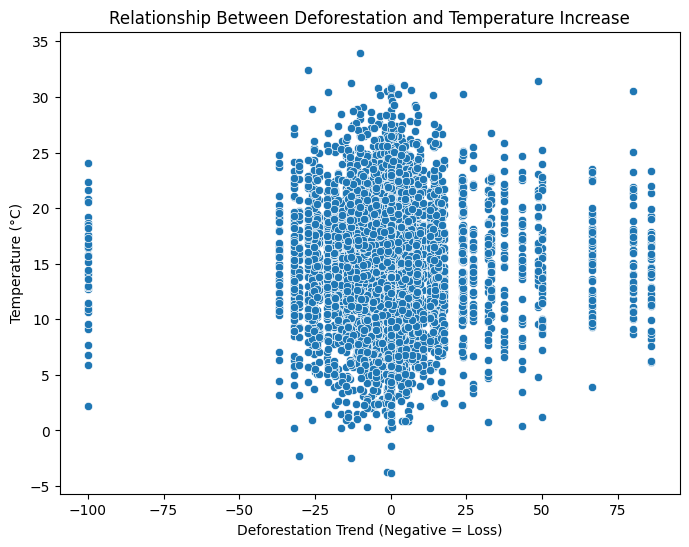

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=merged_df['trend'], y=merged_df['Temperature'])
plt.xlabel("Deforestation Trend (Negative = Loss)")
plt.ylabel("Temperature (°C)")
plt.title("Relationship Between Deforestation and Temperature Increase")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


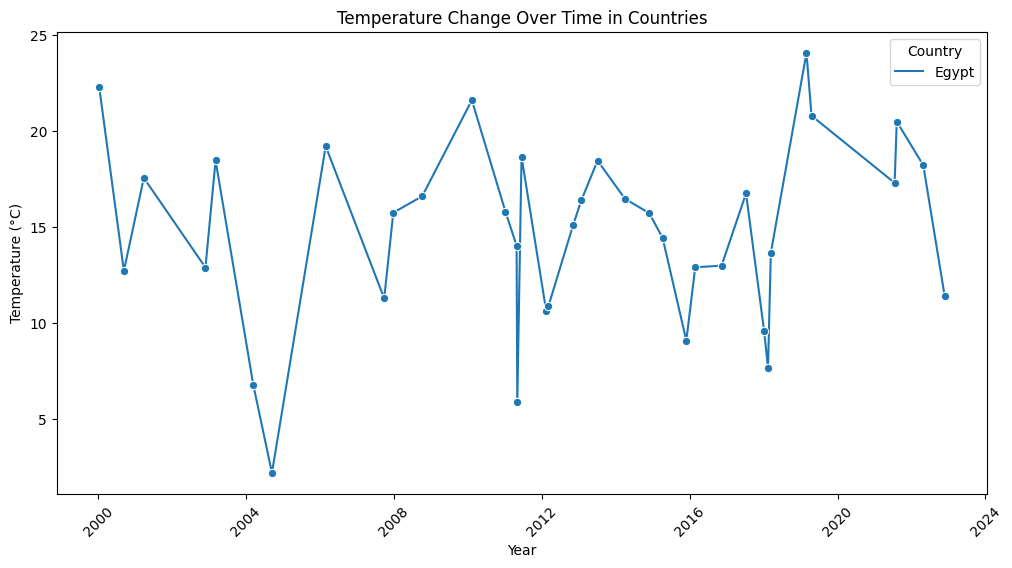

In [29]:
# Select high deforestation countries
high_deforestation_countries = merged_df.sort_values(by="trend").head(50)['Country']
sel_country = "Egypt"
# Filter climate data for these countries
filtered_climate = climate_df[climate_df['Country'] == sel_country]

# Line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_climate, x='Date', y='Temperature', hue='Country', marker="o")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Change Over Time in Countries")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.show()

In [30]:
high_deforestation_countries 

3936        Egypt
5510        Egypt
6083        Egypt
4541        Egypt
7483        Egypt
6258        Egypt
6297        Egypt
7501        Egypt
5595        Egypt
2694        Egypt
5298        Egypt
1115        Egypt
3930        Egypt
3822        Egypt
3977        Egypt
7755        Egypt
1465        Egypt
1652        Egypt
6321        Egypt
1017        Egypt
3048        Egypt
4460        Egypt
2147        Egypt
7955        Egypt
5844        Egypt
6690        Egypt
3504        Egypt
8           Egypt
5178        Egypt
4207        Egypt
4226        Egypt
6649        Egypt
4692        Egypt
4945        Egypt
240         Egypt
2789        Egypt
434         Egypt
7830    Nicaragua
3495    Nicaragua
6158    Nicaragua
303     Nicaragua
2760    Nicaragua
3574    Nicaragua
313     Nicaragua
543     Nicaragua
7060    Nicaragua
2205    Nicaragua
4673    Nicaragua
4407    Nicaragua
3006    Nicaragua
Name: Country, dtype: object

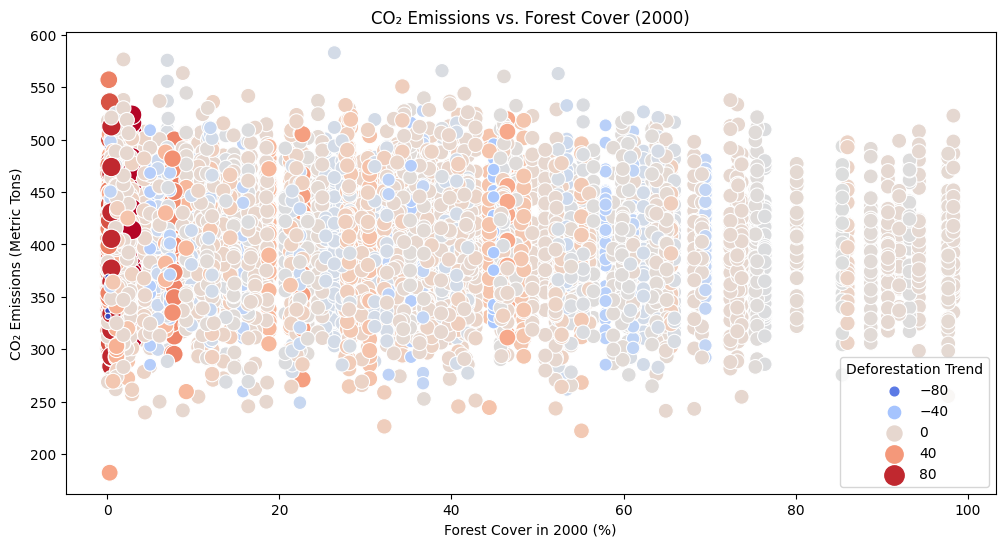

In [31]:
# Scatter plot comparing forest cover in 2000 vs CO₂ emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x="forests_2000", y="CO2 Emissions", hue="trend", size="trend", sizes=(20, 200), palette="coolwarm")
plt.xlabel("Forest Cover in 2000 (%)")
plt.ylabel("CO₂ Emissions (Metric Tons)")
plt.title("CO₂ Emissions vs. Forest Cover (2000)")
plt.legend(title="Deforestation Trend")
plt.show()

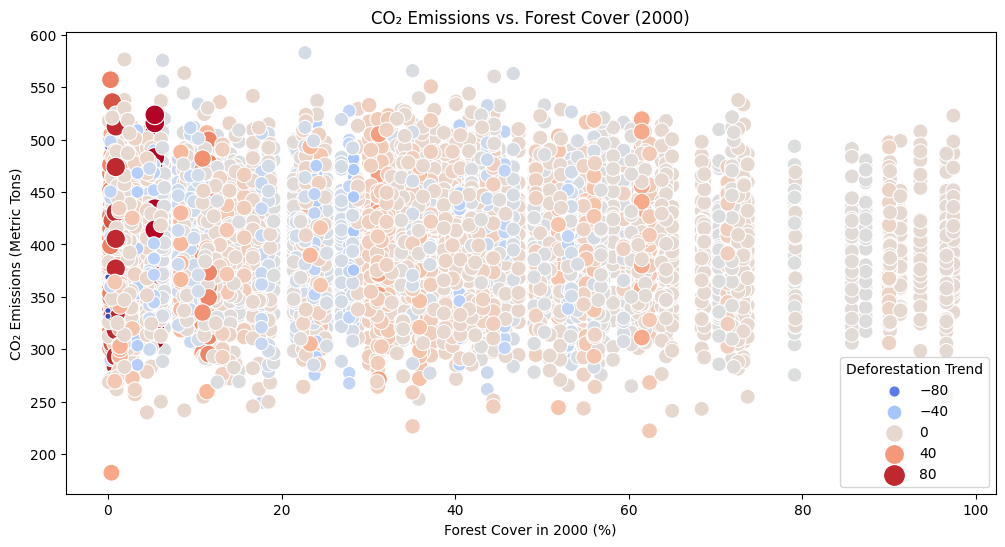

In [32]:
# Scatter plot comparing forest cover in 2000 vs CO₂ emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x="forests_2020", y="CO2 Emissions", hue="trend", size="trend", sizes=(20, 200), palette="coolwarm")
plt.xlabel("Forest Cover in 2000 (%)")
plt.ylabel("CO₂ Emissions (Metric Tons)")
plt.title("CO₂ Emissions vs. Forest Cover (2000)")
plt.legend(title="Deforestation Trend")
plt.show()

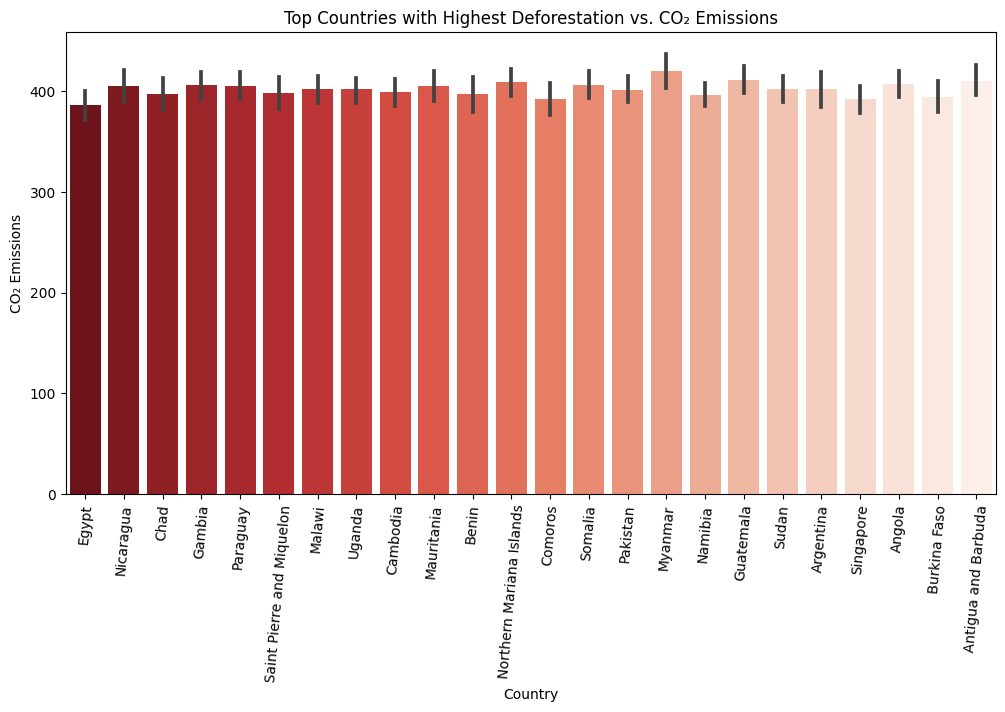

In [59]:
# Select top 10 countries with the highest deforestation
top_deforestation = merged_df.sort_values(by="trend").head(1000)

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_deforestation, x="Country", y="CO2 Emissions", palette="Reds_r")
plt.xlabel("Country")
plt.ylabel("CO₂ Emissions")
plt.title("Top Countries with Highest Deforestation vs. CO₂ Emissions")
plt.xticks(rotation=85)
plt.show()

In [34]:
top_deforestation

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,iso3c,forests_2000,forests_2020,trend
3936,2011-05-04 14:44:23.546354624,West Aaronland,Egypt,5.881331,369.216408,-0.135402,99.789917,6.142443,47.159196,EGY,0.1,0.0,-100.0
5510,2015-11-29 16:49:41.098109760,Briantown,Egypt,9.089563,439.738147,-1.010796,61.048164,43.124477,47.071068,EGY,0.1,0.0,-100.0
6083,2017-07-11 10:33:48.442844224,Torreshaven,Egypt,16.760721,412.239454,-0.091472,68.953914,63.393459,12.345842,EGY,0.1,0.0,-100.0
4541,2013-01-25 08:34:33.807380736,East Monicafort,Egypt,16.393301,409.459530,-0.184656,43.687467,38.072885,24.086561,EGY,0.1,0.0,-100.0
7483,2021-07-18 01:36:20.738073728,Donaldville,Egypt,17.310069,431.536042,-0.860482,18.017012,84.029571,27.418770,EGY,0.1,0.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,2014-05-11 15:28:01.728172800,North Michael,Burkina Faso,17.910879,421.612851,0.862740,37.508353,35.334767,18.161855,BFA,26.4,22.7,-14.0
2522,2007-03-26 05:22:44.176417632,Troymouth,Burkina Faso,14.999354,312.592356,-0.092809,63.855001,37.703978,4.081960,BFA,26.4,22.7,-14.0
3117,2008-12-19 11:42:04.212421216,Stevenhaven,Burkina Faso,13.787483,399.550004,0.467779,40.829363,62.803978,26.599148,BFA,26.4,22.7,-14.0
2501,2007-03-04 09:09:59.459945984,New Glenn,Antigua and Barbuda,16.286470,505.768572,1.451116,47.226822,99.154390,21.202153,ATG,21.5,18.5,-14.0


In [35]:
# Group by 'Country' and aggregate the data
aggregated_df = merged_df.groupby("Country").agg({
    "Temperature": "mean",
    "CO2 Emissions": "sum",  # Sum total emissions
    "Sea Level Rise": "mean",
    "Precipitation": "mean",
    "Humidity": "mean",
    "Wind Speed": "mean",
    "forests_2000": "mean",
    "forests_2020": "mean",
    "trend": "mean"  # Average deforestation trend
}).reset_index()

# Sort countries with the highest deforestation trend
top_deforestation_countries = aggregated_df.sort_values(by="trend", ascending=True).head(10)
print(top_deforestation_countries)

                       Country  Temperature  CO2 Emissions  Sea Level Rise  \
52                       Egypt    14.732166   14307.105716       -0.224828   
128                  Nicaragua    14.764784   17004.588029        0.076185   
65                      Gambia    14.237316   19077.422532       -0.038925   
36                        Chad    14.700230   17081.084979        0.073344   
140                   Paraguay    14.139286   18625.596930       -0.098715   
151  Saint Pierre and Miquelon    15.288951   11165.304924        0.037499   
106                     Malawi    15.675959   13663.209480        0.038647   
183                     Uganda    15.649164   20099.169262       -0.088061   
31                    Cambodia    14.573737   18346.511042        0.096984   
113                 Mauritania    14.218332   13377.171093       -0.037000   

     Precipitation   Humidity  Wind Speed  forests_2000  forests_2020  trend  
52       54.372475  48.652548   23.915319           0.1       

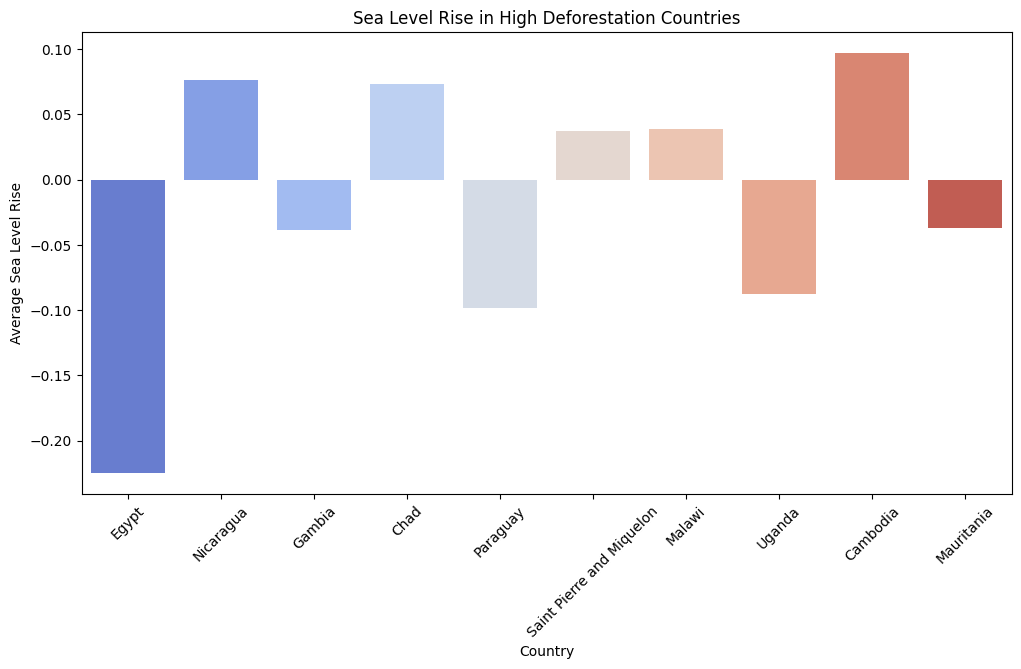

In [39]:
# Select top 10 deforested countries
top_deforestation_countries = aggregated_df.sort_values(by="trend", ascending=True).head(10)

# Bar plot for sea level rise in high deforestation countries
plt.figure(figsize=(12,6))
sns.barplot(data=top_deforestation_countries, x="Country", y="Sea Level Rise", palette="coolwarm")
plt.xlabel("Country")
plt.ylabel("Average Sea Level Rise")
plt.title("Sea Level Rise in High Deforestation Countries")
plt.xticks(rotation=45)
plt.show()


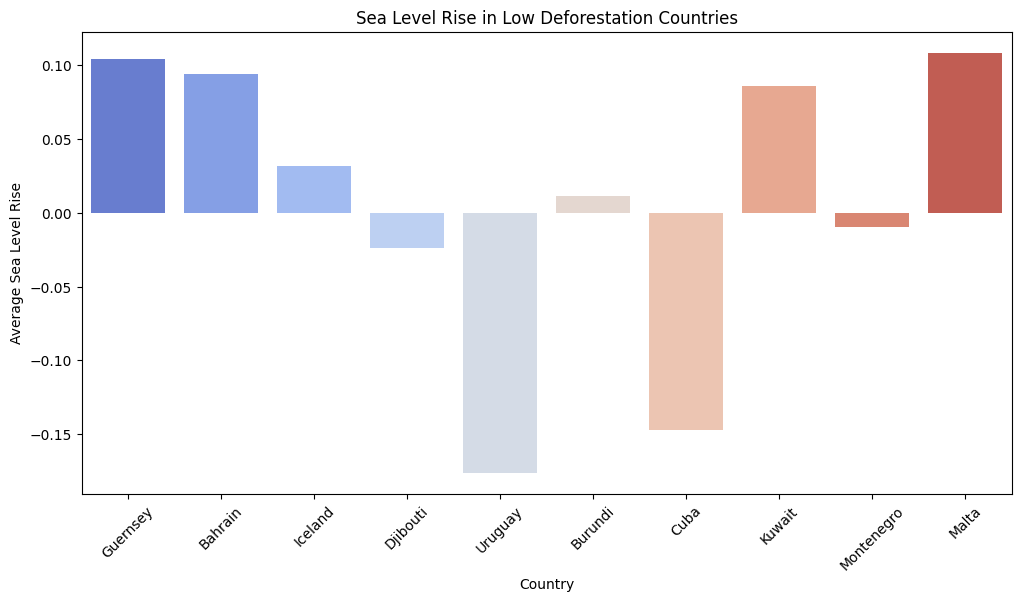

In [57]:
# Select top 10 deforested countries
bottom_deforestation_countries = aggregated_df.sort_values(by="trend", ascending=False).head(10)

# Bar plot for sea level rise in high deforestation countries
plt.figure(figsize=(12,6))
sns.barplot(data=bottom_deforestation_countries, x="Country", y="Sea Level Rise", palette="coolwarm")
plt.xlabel("Country")
plt.ylabel("Average Sea Level Rise")
plt.title("Sea Level Rise in Low Deforestation Countries")
plt.xticks(rotation=45)
plt.show()


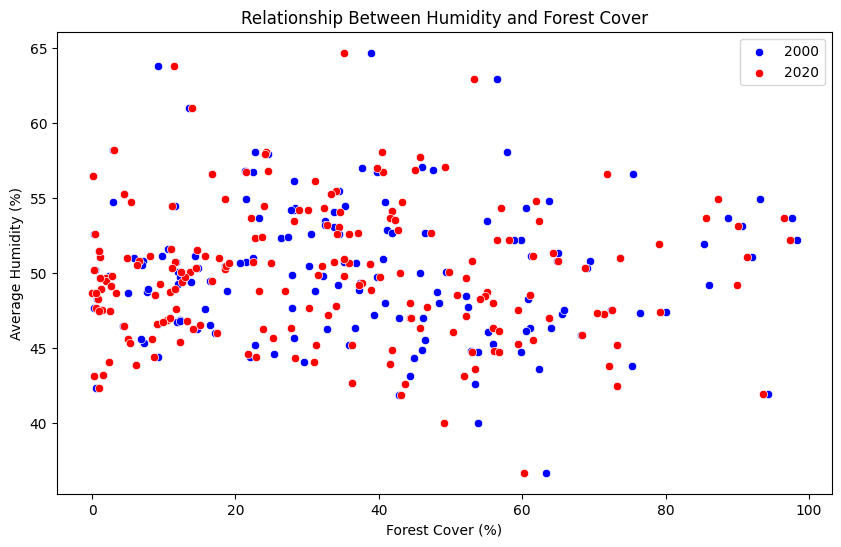

Correlation between Humidity and Forest Cover in 2000: -0.023542187889997852
Correlation between Humidity and Forest Cover in 2020: -0.01901647660891426


In [40]:
# Scatter plot to visualize relationship
plt.figure(figsize=(10,6))
sns.scatterplot(data=aggregated_df, x="forests_2000", y="Humidity", color="blue", label="2000")
sns.scatterplot(data=aggregated_df, x="forests_2020", y="Humidity", color="red", label="2020")
plt.xlabel("Forest Cover (%)")
plt.ylabel("Average Humidity (%)")
plt.title("Relationship Between Humidity and Forest Cover")
plt.legend()
plt.show()

# Calculate correlation
correlation_2000 = aggregated_df["forests_2000"].corr(aggregated_df["Humidity"])
correlation_2020 = aggregated_df["forests_2020"].corr(aggregated_df["Humidity"])

print(f"Correlation between Humidity and Forest Cover in 2000: {correlation_2000}")
print(f"Correlation between Humidity and Forest Cover in 2020: {correlation_2020}")


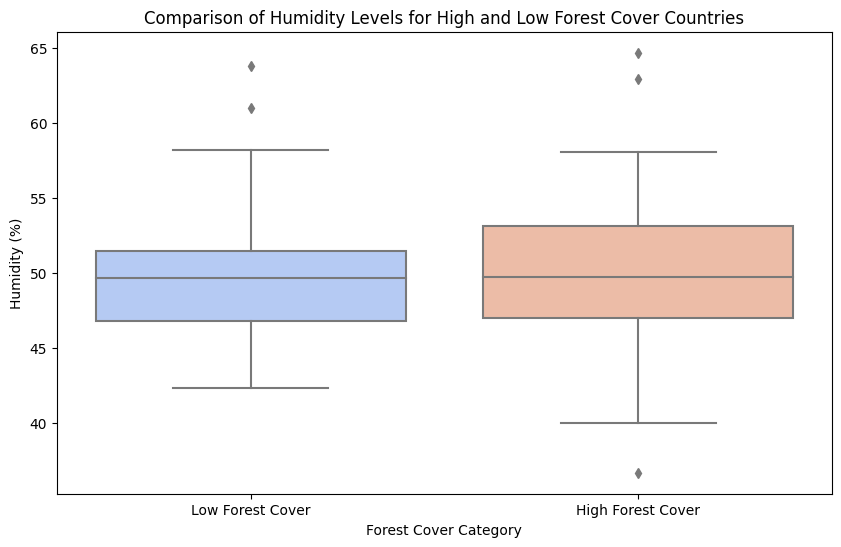

Average Humidity in High Forest Cover Countries: 49.82%
Average Humidity in Low Forest Cover Countries: 49.83%


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define threshold for high and low forest cover
threshold = aggregated_df["forests_2020"].median()

# Classify countries
aggregated_df["Forest_Category"] = aggregated_df["forests_2020"].apply(lambda x: "High Forest Cover" if x >= threshold else "Low Forest Cover")

# Boxplot to compare Humidity levels
plt.figure(figsize=(10,6))
sns.boxplot(data=aggregated_df, x="Forest_Category", y="Humidity", palette="coolwarm")
plt.xlabel("Forest Cover Category")
plt.ylabel("Humidity (%)")
plt.title("Comparison of Humidity Levels for High and Low Forest Cover Countries")
plt.show()

# Compute average humidity for both categories
high_forest_humidity = aggregated_df[aggregated_df["Forest_Category"] == "High Forest Cover"]["Humidity"].mean()
low_forest_humidity = aggregated_df[aggregated_df["Forest_Category"] == "Low Forest Cover"]["Humidity"].mean()

print(f"Average Humidity in High Forest Cover Countries: {high_forest_humidity:.2f}%")
print(f"Average Humidity in Low Forest Cover Countries: {low_forest_humidity:.2f}%")


In [42]:
merged_df

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,iso3c,forests_2000,forests_2020,trend
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,LVA,52.1,54.8,5.2
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,ZAF,14.7,14.1,-4.1
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,GUF,97.7,96.6,-1.1
3,2000-01-06 00:58:19.549954995,Port Richardfurt,Tuvalu,21.646738,387.648437,0.058471,9.650389,11.402284,15.720944,TUV,33.3,33.3,0.0
4,2000-01-06 21:08:02.808280828,Adambury,Australia,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495,AUS,17.2,17.4,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7984,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,BTN,65.5,71.4,9.0
7985,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,COG,65.0,64.3,-1.1
7986,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,ARG,12.2,10.4,-14.8
7987,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255,ALB,28.1,28.8,2.5


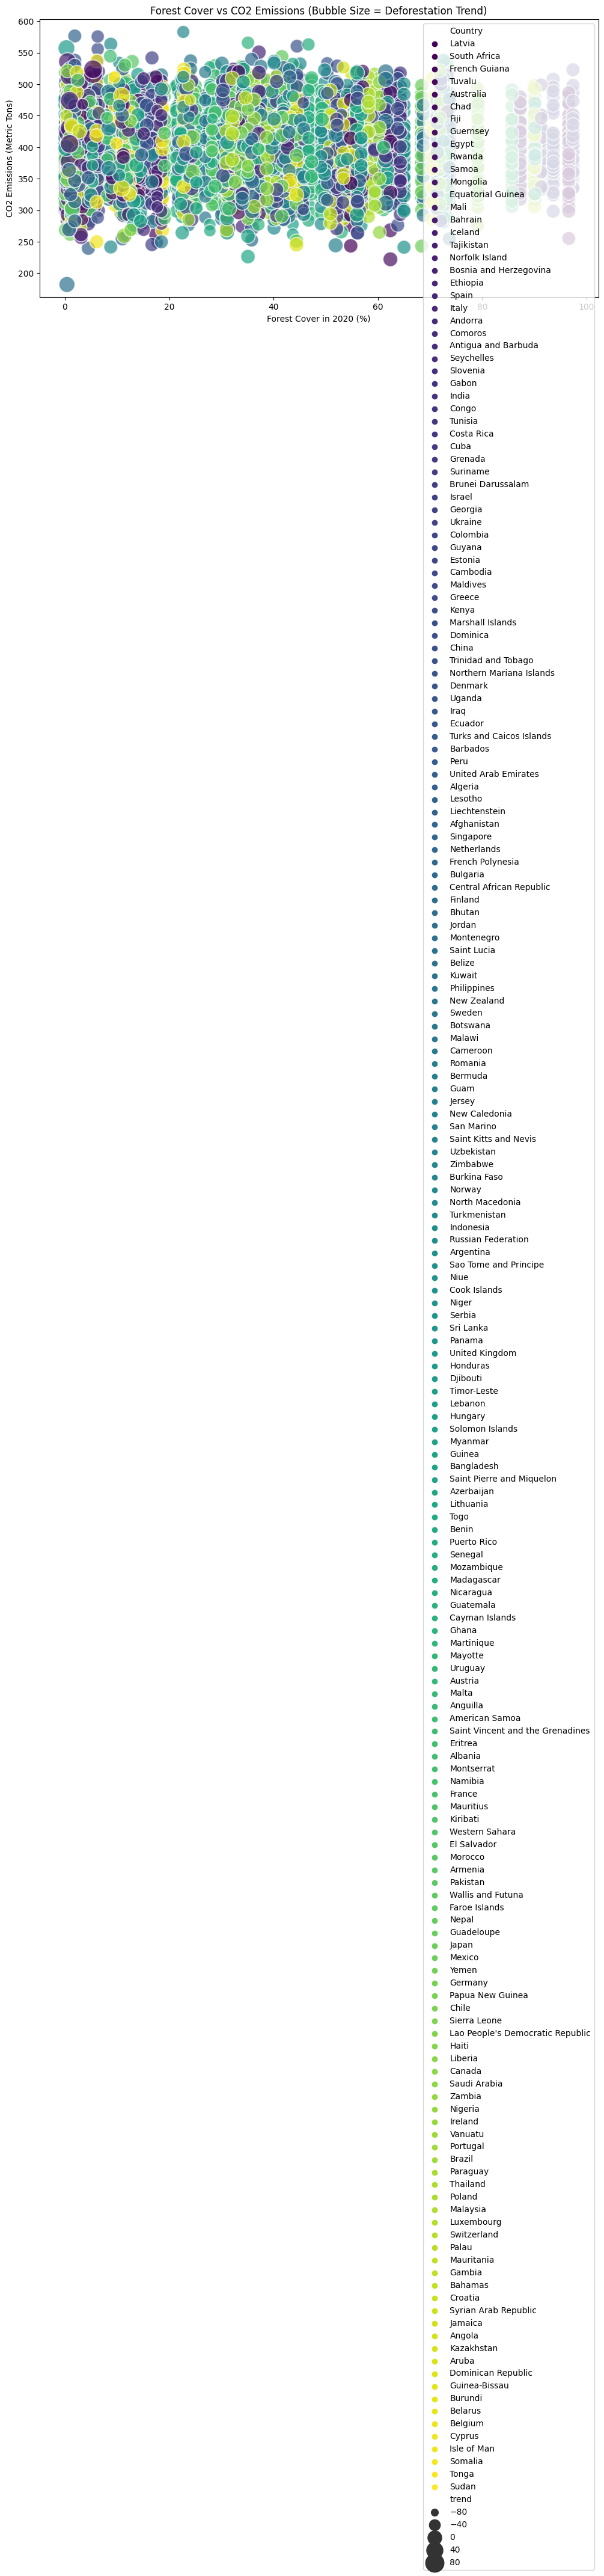

In [49]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged_df, x='forests_2020', y='CO2 Emissions', size='trend', hue='Country', alpha=0.7, palette="viridis", sizes=(20, 500))
plt.xlabel("Forest Cover in 2020 (%)")
plt.ylabel("CO2 Emissions (Metric Tons)")
plt.title("Forest Cover vs CO2 Emissions (Bubble Size = Deforestation Trend)")
plt.legend(loc="upper right")
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 399.460009


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



                                   MAE          MSE  R² Score
Linear Regression            39.031522  2423.602020 -0.002024
Decision Tree                56.493370  4990.317293 -1.063217
Random Forest                40.112850  2544.860088 -0.052157
SVR                          39.086107  2431.442871 -0.005266
XGBoost                      42.654890  2859.399088 -0.182201
LightGBM                     40.126219  2551.306749 -0.054823
Gradient Boosting Regressor  39.269419  2445.098301 -0.010911
ADA Boost                    38.983853  2427.012463 -0.003434
K Neighbors Regressor        43.072965  2987.995822 -0.235369
Linear SVR                   41.918950  2748.821508 -0.136484


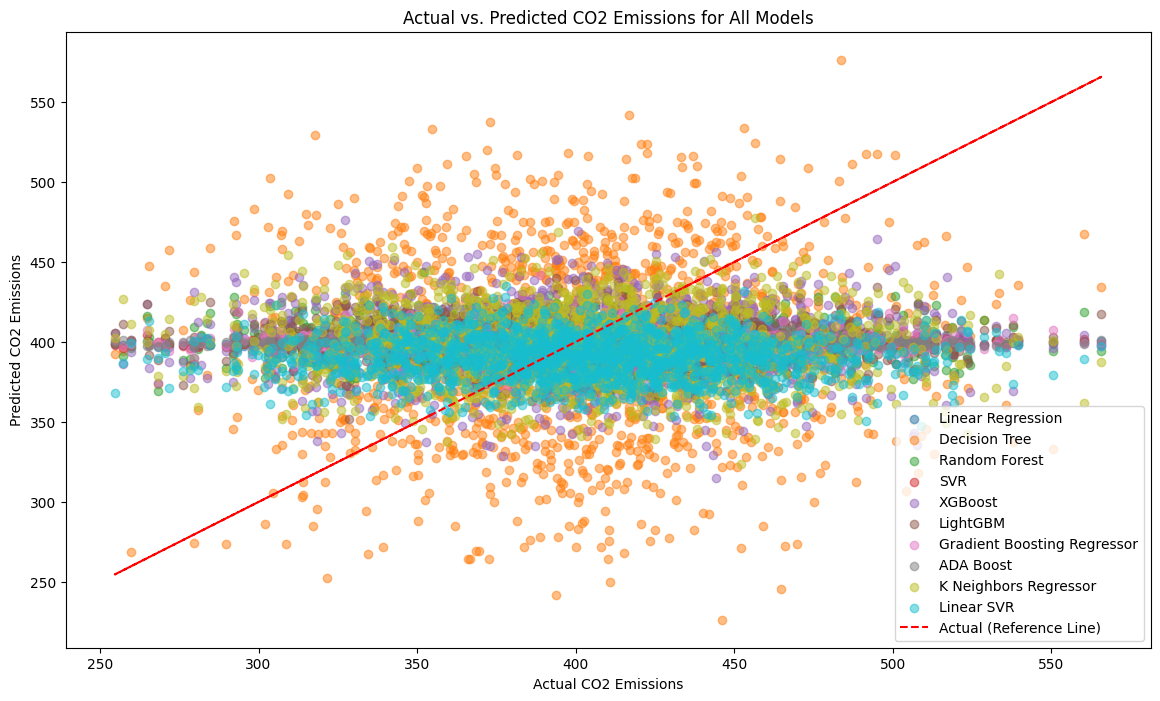

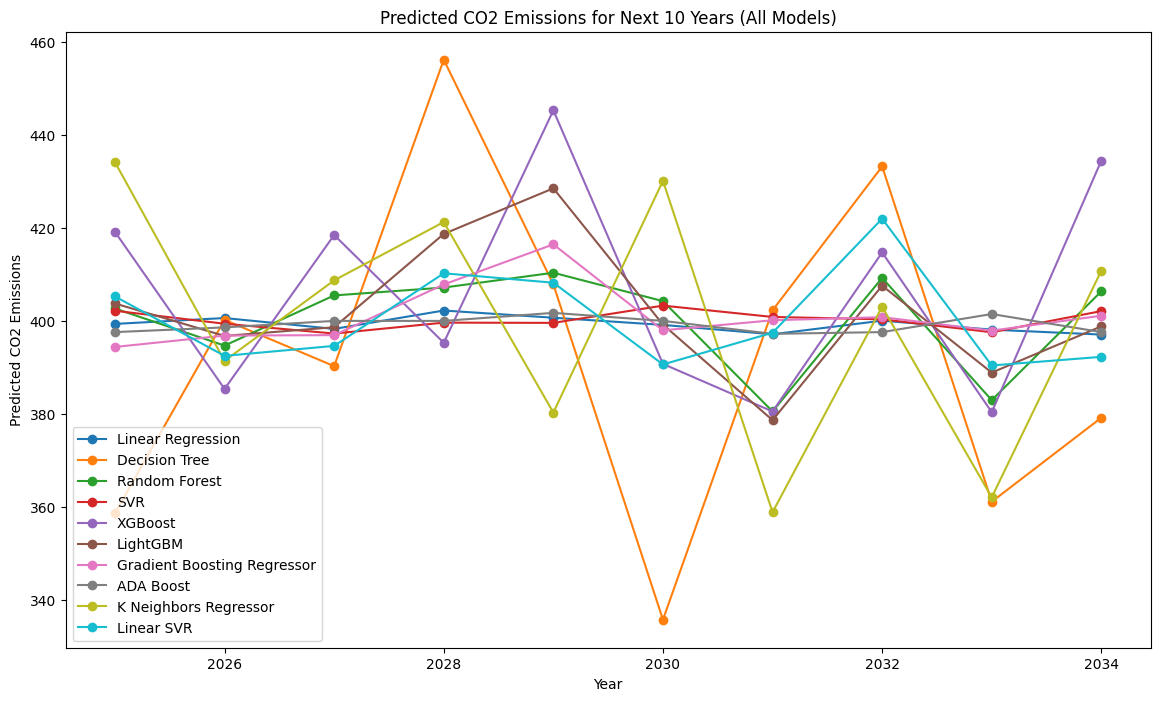

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select Features for Prediction
features = ['Temperature', 'forests_2000', 'forests_2020', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']
target = 'CO2 Emissions'

# Convert Date to Year (numeric format)
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year

# Train-Test Split
X = merged_df[features]
y = merged_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'ADA Boost': AdaBoostRegressor(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Linear SVR': LinearSVR(),
}

# Train & Evaluate Models
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store predictions for comparison
    predictions[name] = y_pred
    
    # Model Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'R² Score': r2}
    
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Predict Future CO2 Emissions (Next 10 Years)
future_years = np.array(range(2025, 2035)).reshape(-1, 1)
future_X = X_test.sample(len(future_years), replace=True)  # Reuse test samples

future_predictions = {}
for name, model in models.items():
    future_predictions[name] = model.predict(future_X)

# --- PLOT 1: Actual vs. Predicted CO2 Emissions for All Models ---
plt.figure(figsize=(14, 8))

for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)

plt.plot(y_test, y_test, color='red', linestyle='--', label="Actual (Reference Line)")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs. Predicted CO2 Emissions for All Models")
plt.legend()
plt.show()

# --- PLOT 2: Future CO2 Emissions Trend for All Models ---
plt.figure(figsize=(14, 8))

for name, y_pred in future_predictions.items():
    plt.plot(future_years, y_pred, marker='o', linestyle='-', label=name)

plt.xlabel("Year")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Predicted CO2 Emissions for Next 10 Years (All Models)")
plt.legend()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 2
[LightGBM] [Info] Start training from score -0.253481


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



                                      MAE           MSE  R² Score
Linear Regression            6.460674e+00  2.141227e+02  0.316514
Decision Tree                2.508857e-15  2.330890e-29  1.000000
Random Forest                8.889097e-15  3.322688e-28  1.000000
SVR                          4.657652e+00  2.072912e+02  0.338321
XGBoost                      9.811806e-03  1.517911e-04  1.000000
LightGBM                     1.602474e-01  3.925885e-02  0.999875
Gradient Boosting Regressor  3.355431e+00  1.981387e+01  0.936754
ADA Boost                    8.839342e+00  1.529781e+02  0.511690
K Neighbors Regressor        0.000000e+00  0.000000e+00  1.000000
Linear SVR                   6.148021e+00  2.186660e+02  0.302012


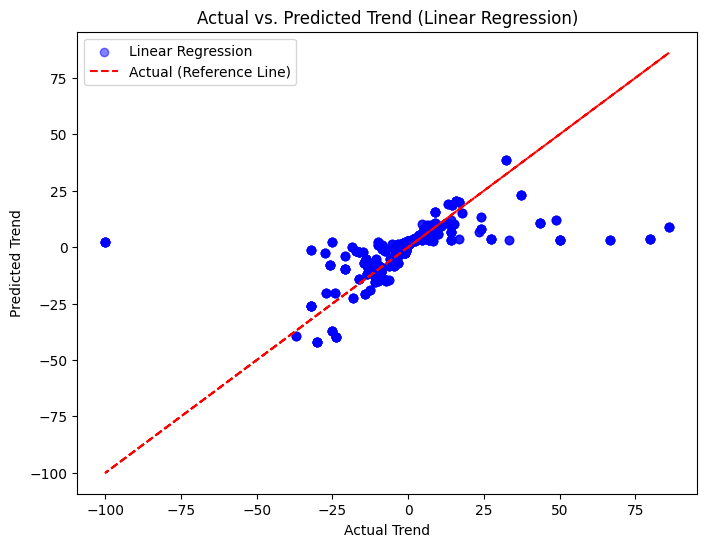

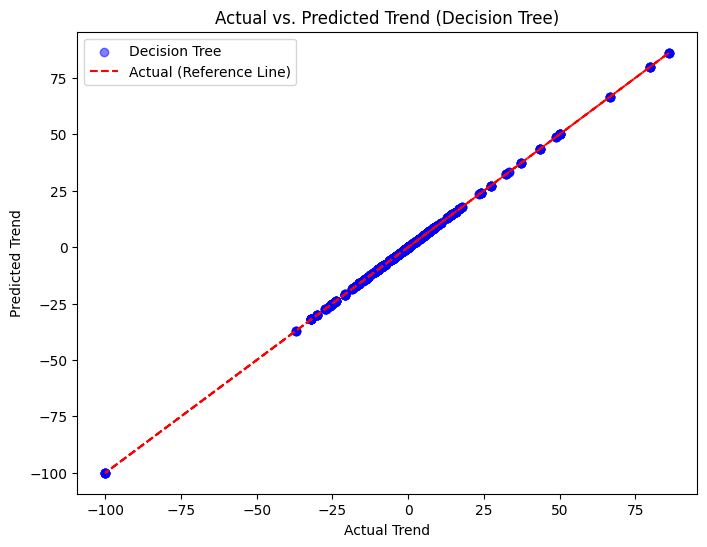

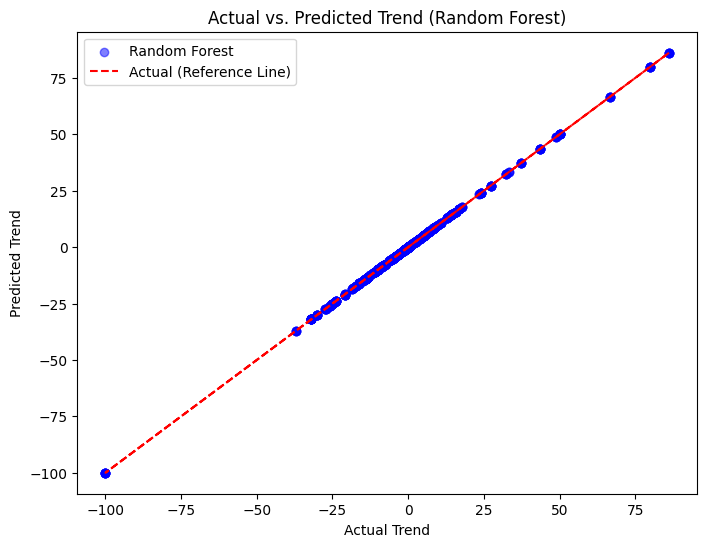

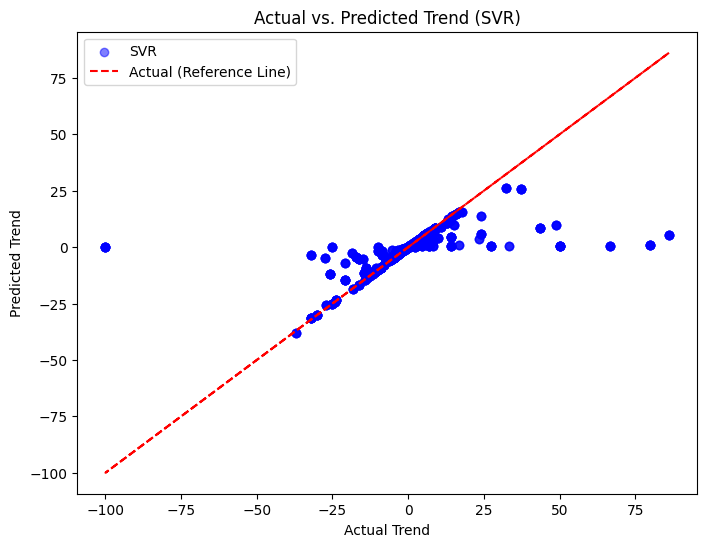

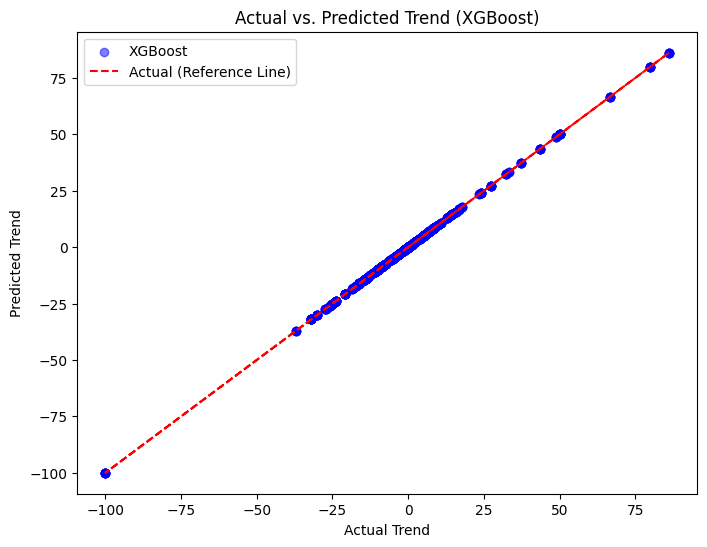

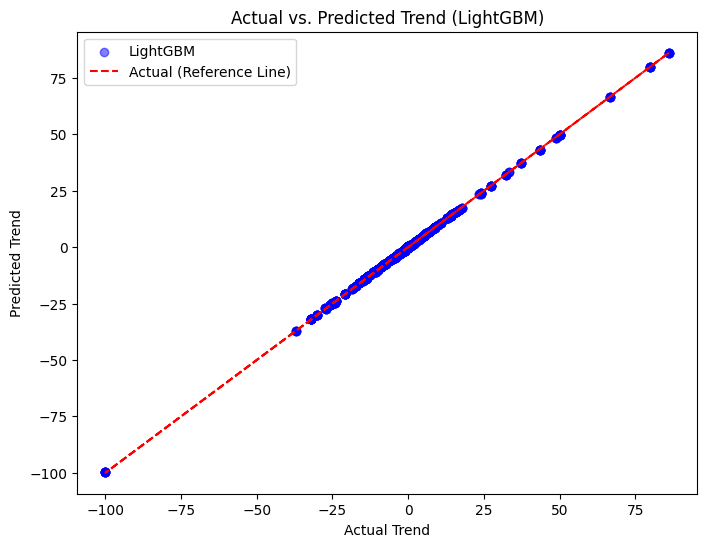

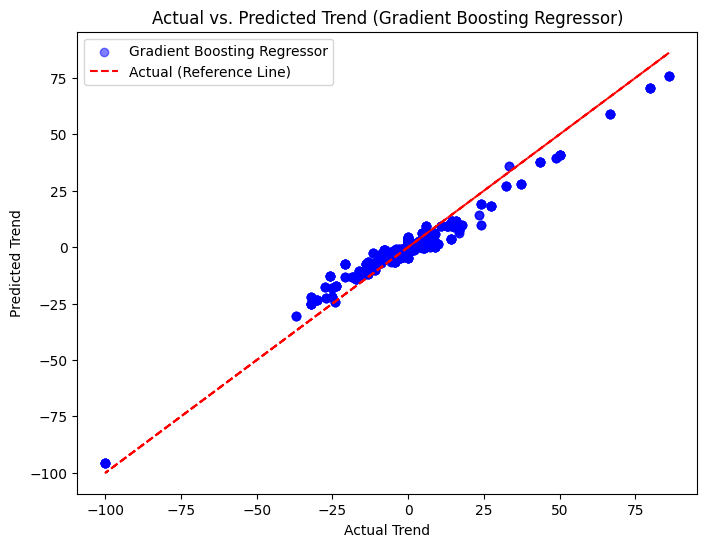

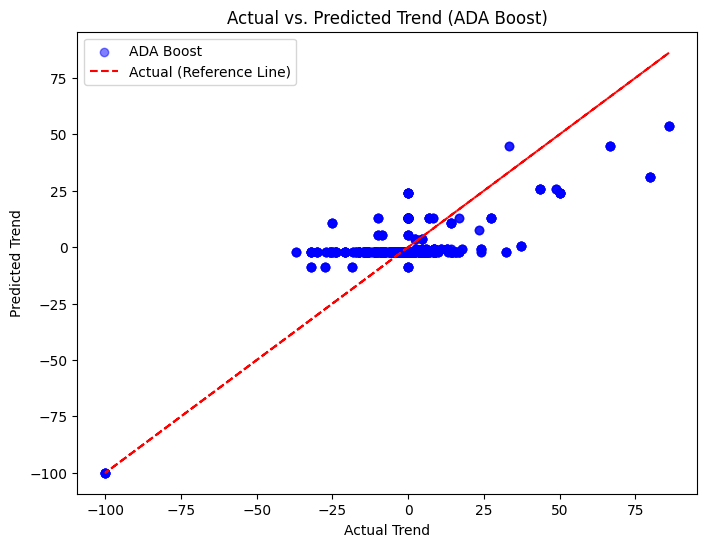

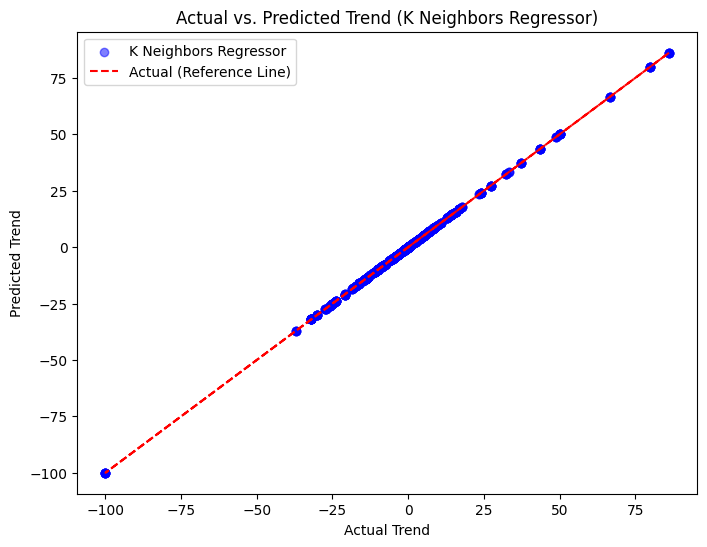

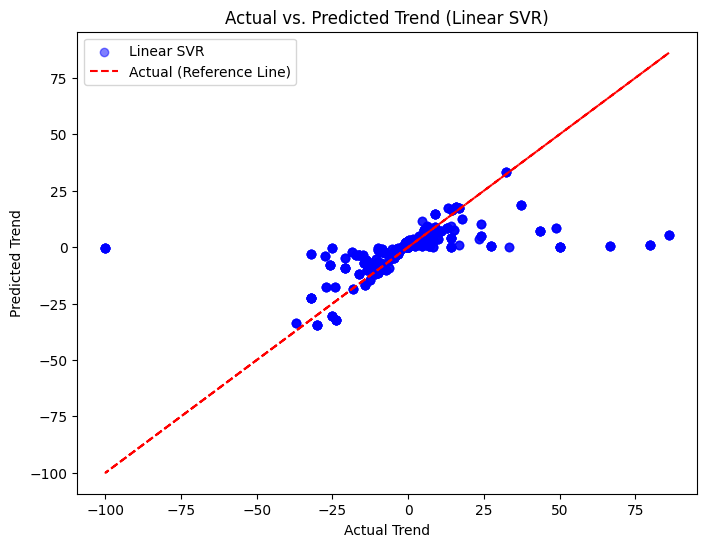

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select Features (Forest Cover in 2000 & 2020)
features = ['forests_2000', 'forests_2020']
target = 'trend'

# Convert Date to Year (numeric format)
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year

# Train-Test Split
X = merged_df[features]
y = merged_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'ADA Boost': AdaBoostRegressor(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Linear SVR': LinearSVR(),
}

# Train & Evaluate Models
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store predictions for comparison
    predictions[name] = y_pred
    
    # Model Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'R² Score': r2}
    
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# --- PLOT: Actual vs. Predicted Trend for Each Model ---
for name, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label=name, color='blue')
    plt.plot(y_test, y_test, color='red', linestyle='--', label="Actual (Reference Line)")
    plt.xlabel("Actual Trend")
    plt.ylabel("Predicted Trend")
    plt.title(f"Actual vs. Predicted Trend ({name})")
    plt.legend()
    plt.show()
